 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whalepath = Path('Resources/whale_returns.csv')
algopath = Path('Resources/algo_returns.csv') 
sppath = Path('Resources/sp_tsx_history.csv')

In [3]:
# Reading whale returns
whale_df = pd.read_csv(whalepath,index_col='Date', infer_datetime_format=True, parse_dates=True)

In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_df = pd.read_csv(algopath,index_col='Date', infer_datetime_format=True, parse_dates=True)

In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sptsx_df = pd.read_csv(sppath,index_col='Date', infer_datetime_format=True, parse_dates=True)

In [10]:
# Check Data Types
sptsx_df.dtypes

Close    object
dtype: object

In [11]:
# To convert objects to float type we have to remove $ and ","
sptsx_df['Close'] = sptsx_df['Close'].str.replace('$','')
sptsx_df['Close'] = sptsx_df['Close'].str.replace(',','')

/var/folders/db/mmhgjthn3x50rg_cdw8_92d40000gn/T/ipykernel_41319/251293892.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sptsx_df['Close'] = sptsx_df['Close'].str.replace('$','')


In [12]:
# Fix Data Types
sptsx_df['Close'] = sptsx_df['Close'].astype('float')

In [13]:
# data type check
sptsx_df.dtypes

Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
sptsx_daily_returns = sptsx_df.pct_change()

In [15]:
# Drop nulls
sptsx_daily_returns.dropna(inplace=True)

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sptsx_daily_returns.rename(columns={'Close': 'SPTSX'},inplace=True)
sptsx_daily_returns.head()

,SPTSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_file = pd.concat([whale_df,algo_df,sptsx_daily_returns], axis='columns', join='inner')
combined_file.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

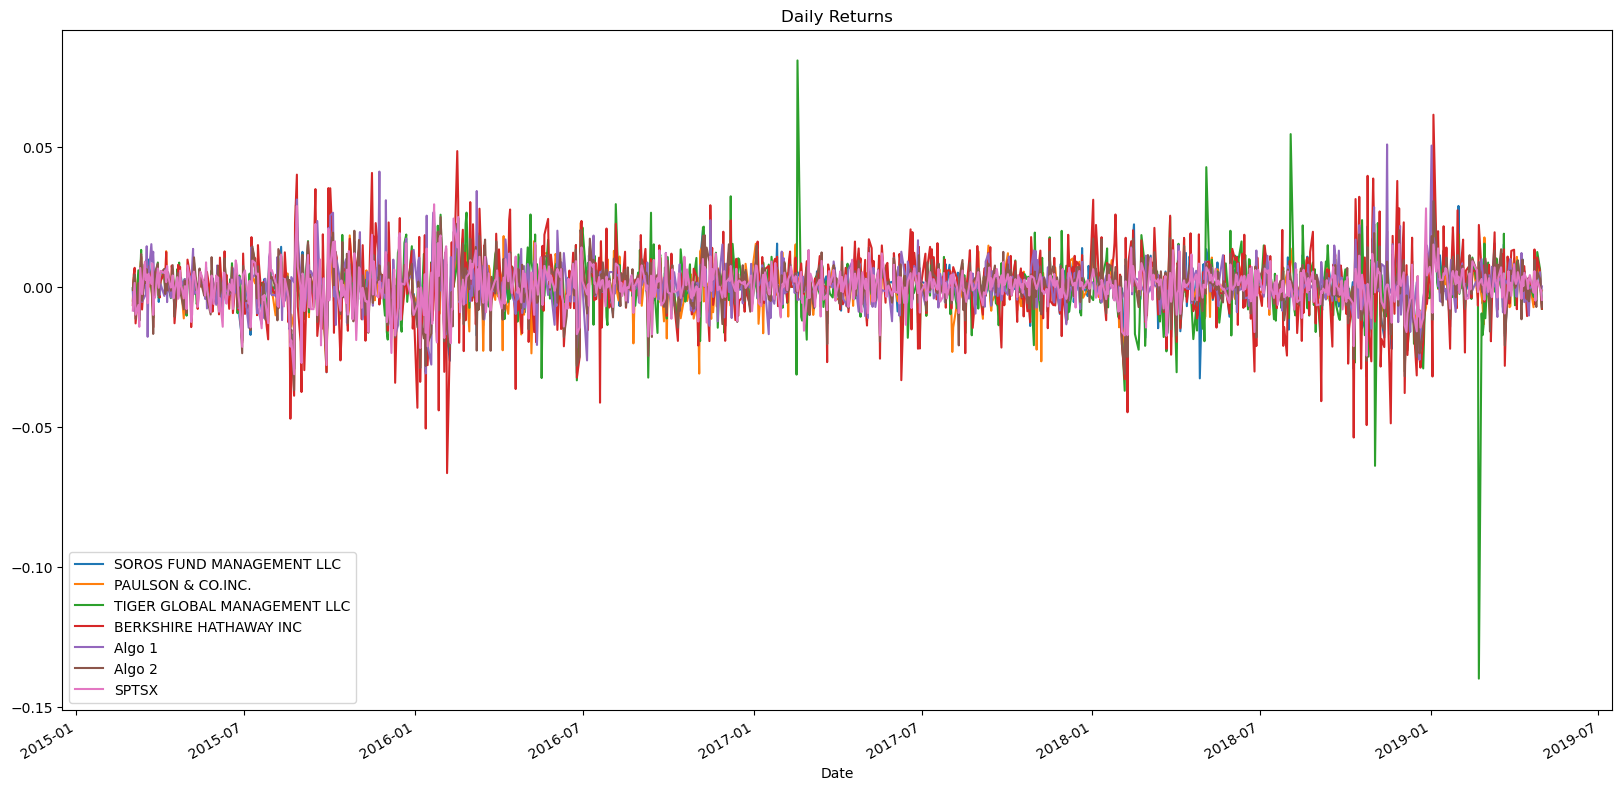

In [18]:
# Plot daily returns of all portfolios
combined_file.plot(figsize = (20,10), title='Daily Returns');


#### Calculate and Plot cumulative returns.

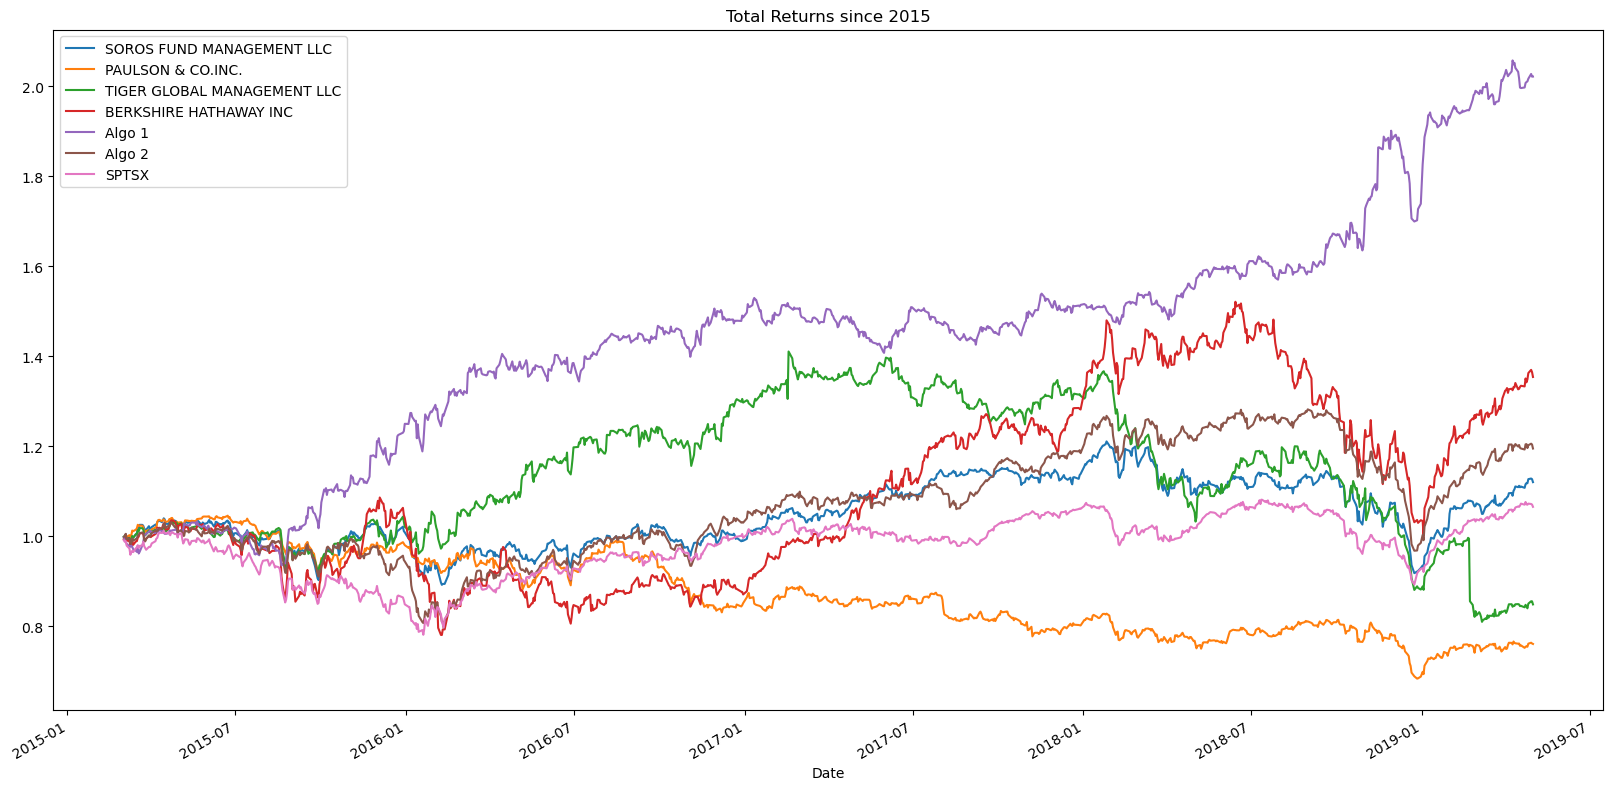

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_return = (1+combined_file).cumprod()
# Plot cumulative returns
cumulative_return.plot(figsize = (20,10), title= 'Total Returns since 2015');

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


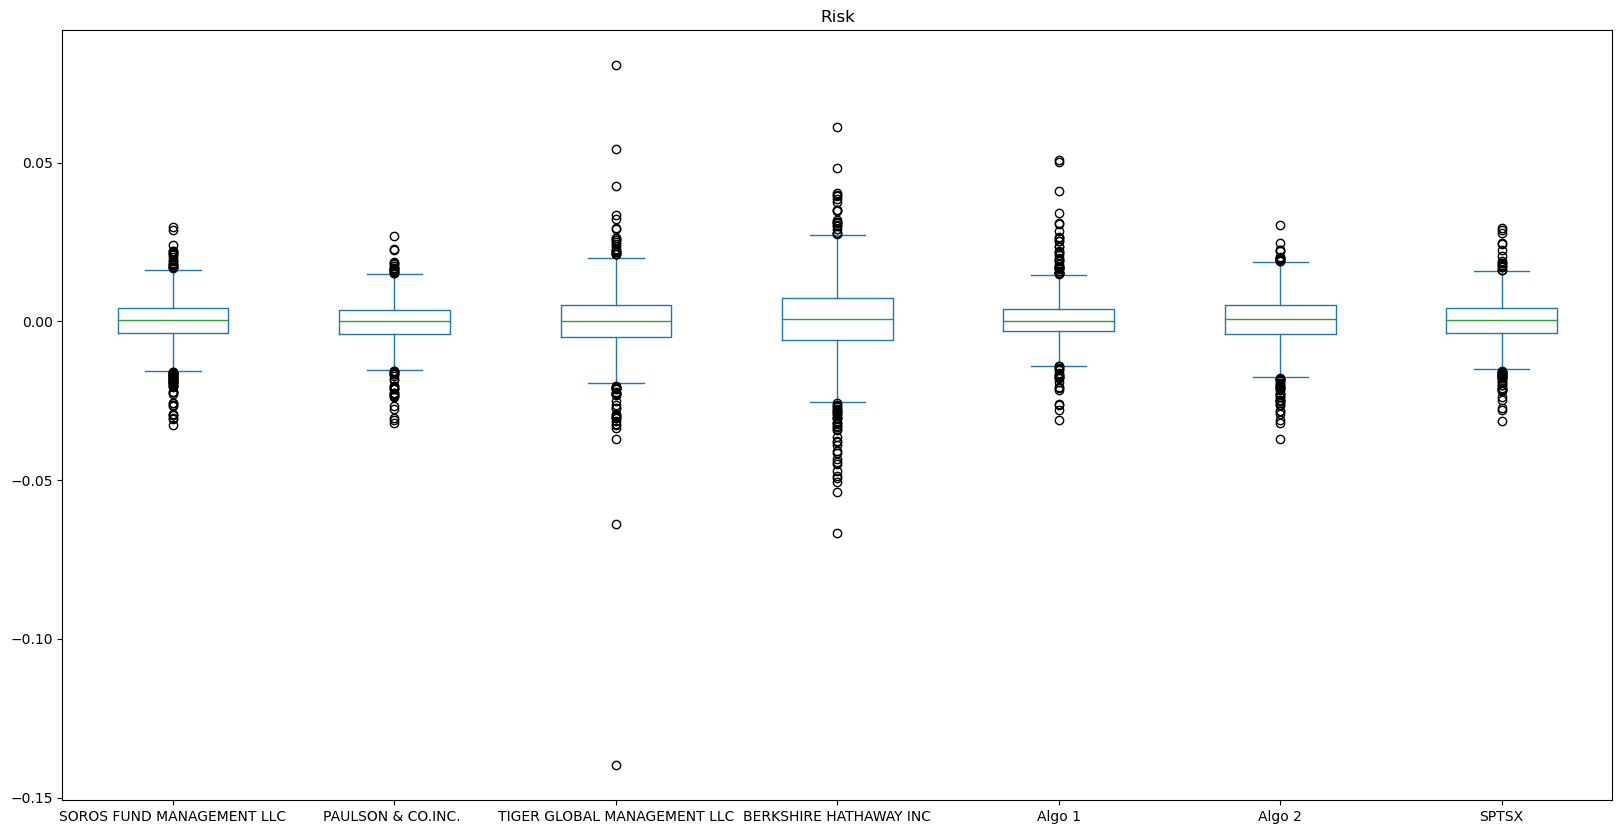

In [20]:
# Box plot to visually show risk
combined_file.plot.box(figsize = (20,10), title='Risk');

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
sd_combined = combined_file.std()
sd_combined.sort_values(ascending=False)


BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
SPTSX                          0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

<Axes: title={'center': 'All riskier than SPTSX except Paulson'}>

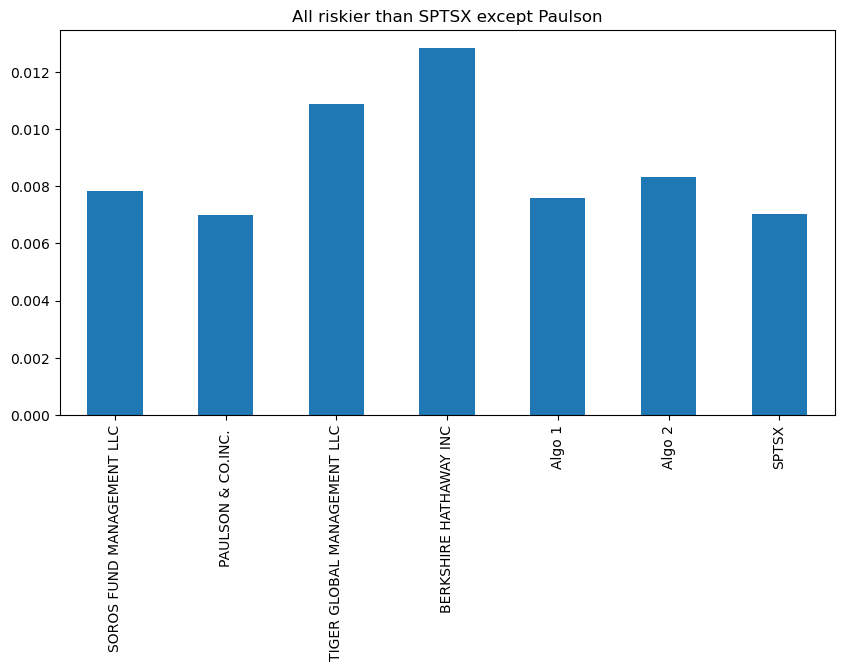

In [22]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx_sd = combined_file['SPTSX'].std()
tsx_sd

# Determine which portfolios are riskier than the S&P TSX 60
sd_combined.plot.bar(figsize = (10,5), title='All riskier than SPTSX except Paulson')

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualise_sd = sd_combined* np.sqrt(252)
annualise_sd

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SPTSX                          0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

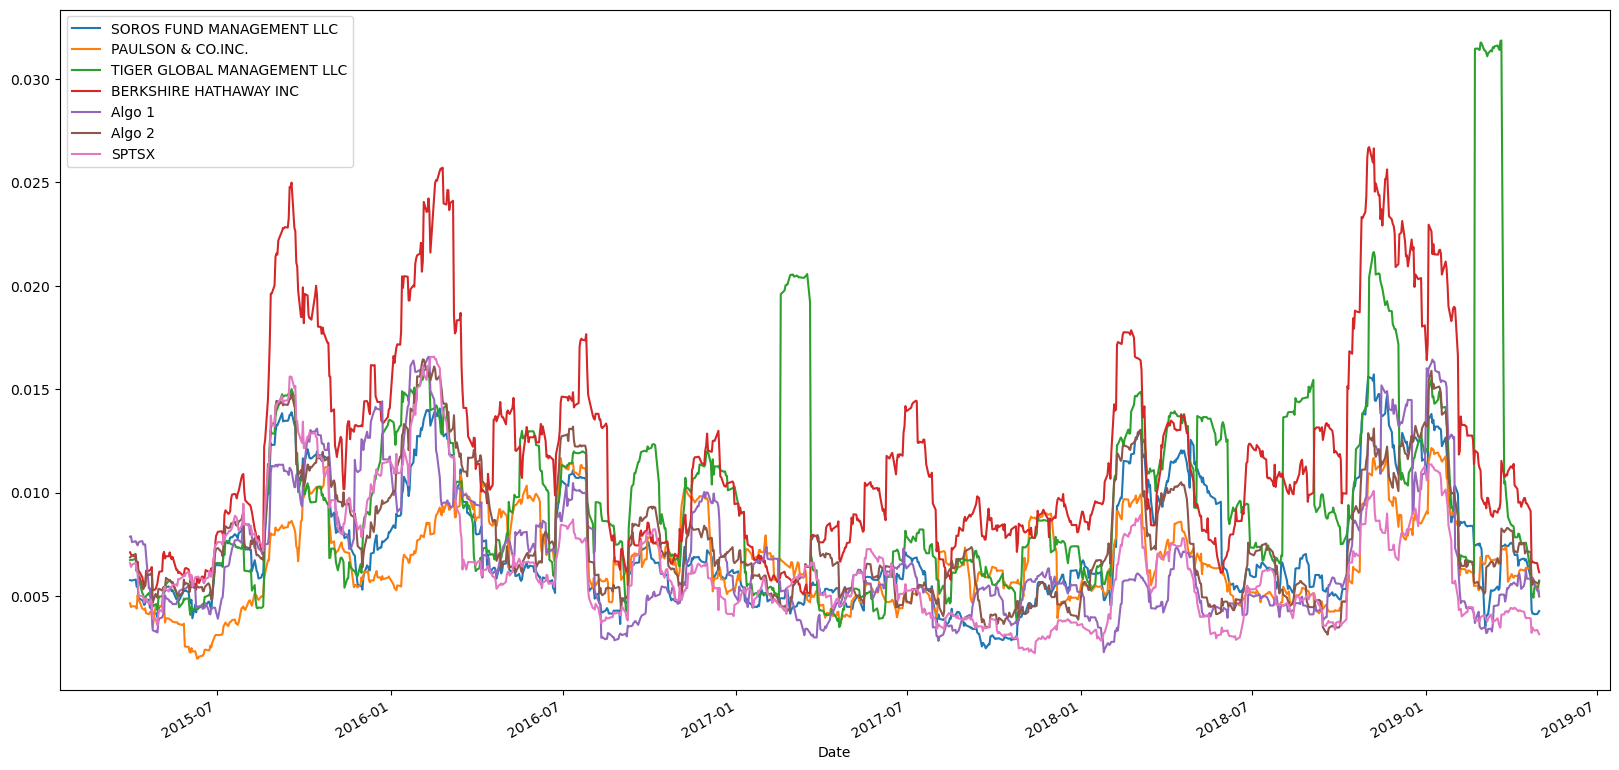

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_sd = combined_file.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_sd.plot(figsize = (20,10));

### Calculate and plot the correlation

<Axes: >

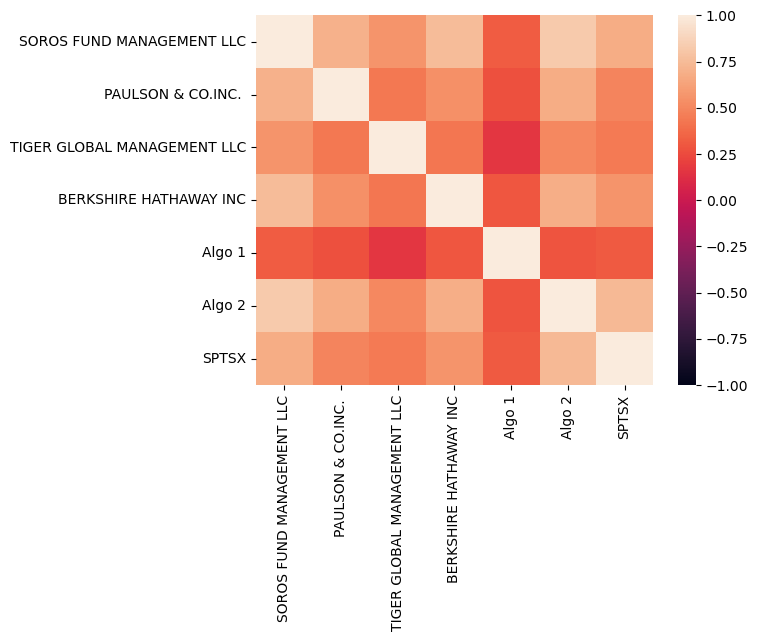

In [25]:
# Calculate the correlation
correlation = combined_file.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

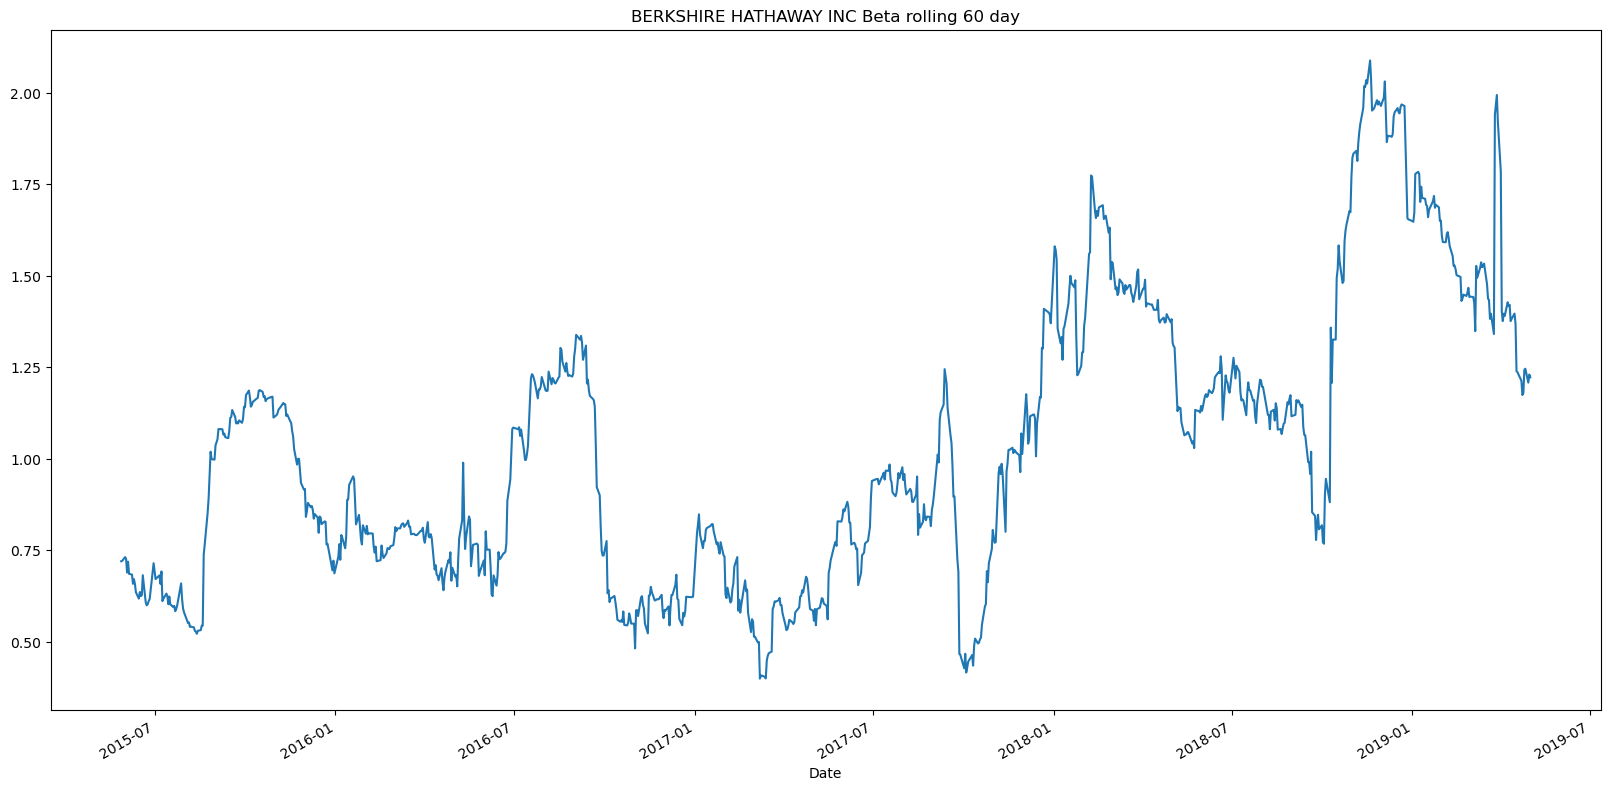

In [26]:
# Calculate covariance of a single portfolio
covariance = combined_file['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_file['SPTSX'])
                                                        
# Calculate variance of S&P TSX
var_sp = combined_file['SPTSX'].rolling(window=60).var()
# Computing beta
berk_beta = covariance/var_sp
# Plot beta trend
berk_beta.plot(figsize = (20,10), title= "BERKSHIRE HATHAWAY INC Beta rolling 60 day");

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

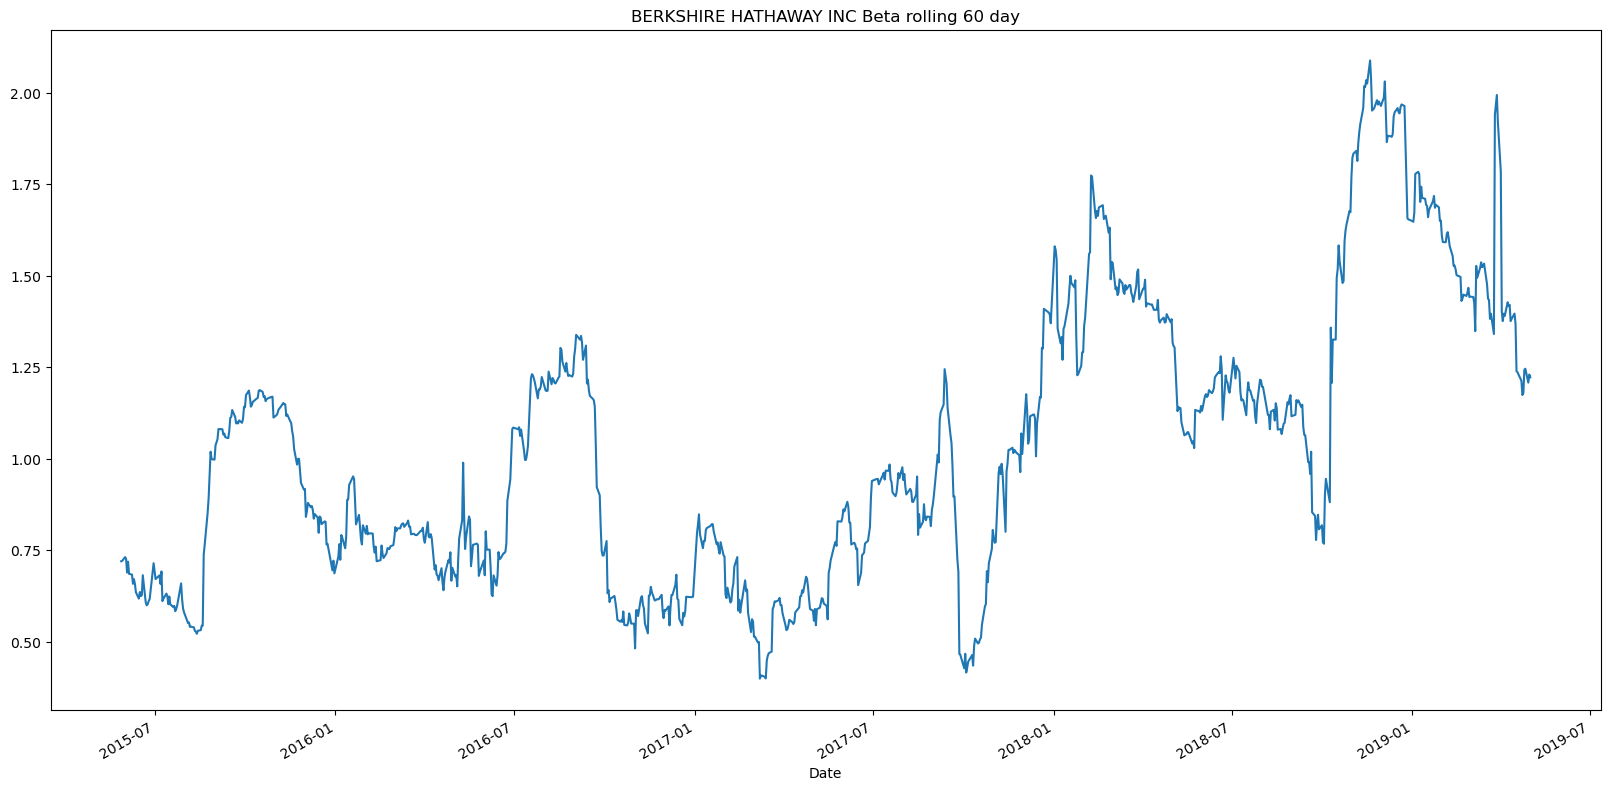

In [27]:
# Use `ewm` to calculate the rolling window
# Calculate covariance of a single portfolio
covariance_ewm = combined_file['BERKSHIRE HATHAWAY INC'].ewm(span=60).cov(combined_file['SPTSX'])
                                                        
# Calculate variance of S&P TSX
var_sp_ewm = combined_file['SPTSX'].ewm(span=60).var()
# Computing beta
berk_beta_ewm = covariance/var_sp
# Plot beta trend
berk_beta_ewm.plot(figsize = (20,10), title= "BERKSHIRE HATHAWAY INC Beta rolling 60 day");

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharp_ratio = (combined_file.mean()*252)/(combined_file.std()*np.sqrt(252))
sharp_ratio.sort_values(ascending=False,inplace=True)

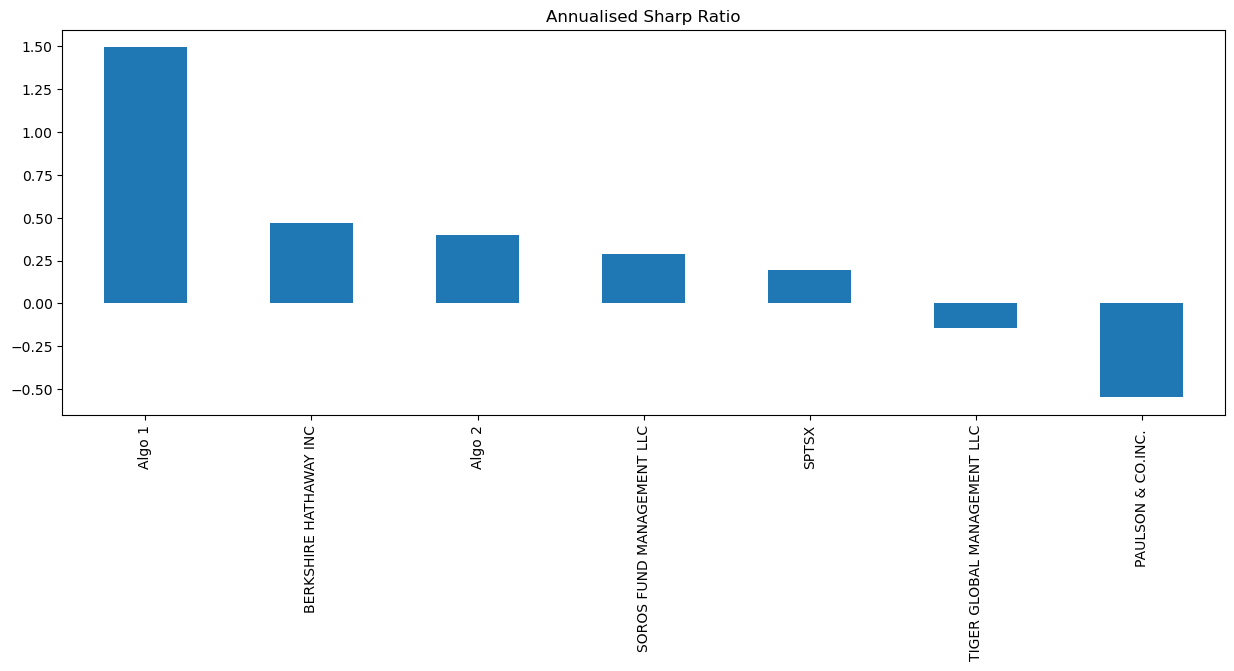

In [29]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot.bar(figsize=(15,5),title='Annualised Sharp Ratio');

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!



---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
AVHpath = Path('Resources/AVH.csv')
ANZpath = Path('Resources/ANZ.csv') 
VGADpath = Path('Resources/VGAD.csv')
custom_port = Path('Resources/custom_port_with_olddates.csv')
avh_df = pd.read_csv(AVHpath,index_col='Date', infer_datetime_format=True, parse_dates=True)
avh_df.head()

,AVH
Date,
2021-01-08 16:00:00,4.98
2021-01-11 16:00:00,4.85
2021-01-12 16:00:00,5.59
2021-01-13 16:00:00,5.31
2021-01-14 16:00:00,5.52


In [31]:
# Reading data from 2nd stock
anz_df = pd.read_csv(ANZpath,index_col='Date', infer_datetime_format=True, parse_dates=True)
anz_df.head()

,ANZ
Date,
2021-01-08 16:00:00,23.65
2021-01-11 16:00:00,23.66
2021-01-12 16:00:00,23.86
2021-01-13 16:00:00,23.97
2021-01-14 16:00:00,24.41


In [32]:
# Reading data from 3rd stock
vgad_df = pd.read_csv(VGADpath,index_col='Date', infer_datetime_format=True, parse_dates=True)
vgad_df.head()

,VGAD
Date,
2021-01-08 16:00:00,81.83
2021-01-11 16:00:00,81.94
2021-01-12 16:00:00,81.58
2021-01-13 16:00:00,81.96
2021-01-14 16:00:00,82.15


In [33]:
#custom portfolio with old dates:
custom_port = pd.read_csv(custom_port)



In [34]:
#drop NA's to make sure all data aligns
custom_port.dropna(inplace=True)

In [35]:
#set Date as index
custom_port.set_index('Date',inplace=True)


In [36]:
# drop not required columns
custom_port.drop(columns=['Date.1','Date.2'],inplace=True)
custom_port

,ANZ,AVH,VGAD
Date,,,
3/4/2015,35.24,1.36,53.38
3/5/2015,35.22,1.36,53.76
3/6/2015,35.11,1.11,53.56
3/9/2015,34.88,1.18,52.60
3/10/2015,35.02,1.22,53.08
...,...,...,...
7/21/2023,25.16,4.85,87.77
7/24/2023,25.12,5.00,88.48
7/25/2023,25.06,4.80,88.56


In [37]:
# Sort date column in dscending order
custom_port.index = pd.to_datetime(custom_port.index)
custom_port.index = custom_port.index.date

custom_port.sort_index(ascending=True,inplace=True)
custom_port

,ANZ,AVH,VGAD
2015-03-04,35.24,1.36,53.38
2015-03-05,35.22,1.36,53.76
2015-03-06,35.11,1.11,53.56
2015-03-09,34.88,1.18,52.60
2015-03-10,35.02,1.22,53.08
...,...,...,...
2023-07-21,25.16,4.85,87.77
2023-07-24,25.12,5.00,88.48
2023-07-25,25.06,4.80,88.56
2023-07-26,25.46,4.81,88.25


In [38]:
# Combine all stocks in a single DataFrame
# combined_custom_port = pd.concat([avh_df,anz_df,vgad_df], axis="columns", join="inner")
# combined_custom_port.head()

In [39]:
# Reset Date index
# save down as new portfolio to
# "done"

In [40]:
# Reorganize portfolio data by having a column per symbol
#"done"


In [41]:
custom_port

,ANZ,AVH,VGAD
2015-03-04,35.24,1.36,53.38
2015-03-05,35.22,1.36,53.76
2015-03-06,35.11,1.11,53.56
2015-03-09,34.88,1.18,52.60
2015-03-10,35.02,1.22,53.08
...,...,...,...
2023-07-21,25.16,4.85,87.77
2023-07-24,25.12,5.00,88.48
2023-07-25,25.06,4.80,88.56
2023-07-26,25.46,4.81,88.25


In [42]:
# Calculate daily returns
custom_port_daily_return = custom_port.pct_change()
# Drop NAs
custom_port_daily_return.replace([np.inf, -np.inf], np.nan, inplace=True)
custom_port_daily_return.dropna(inplace=True)
# Display sample data
custom_port_daily_return.sample(10)

,ANZ,AVH,VGAD
2015-06-25,-0.005694,-0.013333,-0.004531
2016-04-11,-0.001357,-0.034934,0.005322
2020-07-02,0.020288,-0.014658,0.003604
2020-12-18,-0.014109,-0.007752,0.005111
2019-06-18,0.000000,0.040541,0.000881
2016-03-30,-0.003910,-0.037815,0.004901
2015-12-21,0.011801,0.081871,-0.011586
2020-12-17,0.012554,0.035313,0.010824
2019-12-03,-0.010891,-0.072464,0.001491
2016-08-17,0.007205,-0.012579,-0.002210


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [43]:
# Convert the index to datetime format
combined_file.index = pd.to_datetime(combined_file.index)
# Extract just the date for the entire index
combined_file.index = combined_file.index.date



In [44]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_port_daily_returns_dot = custom_port_daily_return.dot(weights)
# Display sample data
custom_port_daily_returns_dot

2015-03-05    0.002184
2015-03-06   -0.063556
2015-03-09    0.012863
2015-03-10    0.015679
2015-03-11   -0.004781
                ...   
2023-07-21   -0.004603
2023-07-24    0.012476
2023-07-25   -0.013828
2023-07-26    0.004848
2023-07-27    0.015164
Length: 2119, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
combined_file.sort_index(ascending=True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183


In [46]:
# Join your returns DataFrame to the original returns DataFrame

combined_file_custom = pd.concat([combined_file,custom_port_daily_returns_dot], axis='columns', join='inner')
combined_file_custom.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX,0
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.002184
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.063556
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.012863
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321,0.015679
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655,-0.004781


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_file_custom.dropna(inplace=True)
combined_file_custom

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX,0
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.002184
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.063556
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.012863
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321,0.015679
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655,-0.004781
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,0.005521
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.016589
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.006970
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183,0.004762


In [48]:
#rename custom_portfolio_name
combined_file_custom.rename(columns={0 : 'My_portfolio'}, inplace=True)
combined_file_custom

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX,My_portfolio
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.002184
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.063556
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.012863
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321,0.015679
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655,-0.004781
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,0.005521
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.016589
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.006970
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183,0.004762


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [49]:
# Calculate the annualized `std`
sd_my_v_other = combined_file_custom.std()
sd_my_v_other.sort_values(ascending=True)

PAULSON & CO.INC.              0.006999
SPTSX                          0.007035
Algo 1                         0.007612
SOROS FUND MANAGEMENT LLC      0.007812
Algo 2                         0.008336
TIGER GLOBAL MANAGEMENT LLC    0.010892
BERKSHIRE HATHAWAY INC         0.012887
My_portfolio                   0.017098
dtype: float64

### Calculate and plot rolling `std` with 21-day window

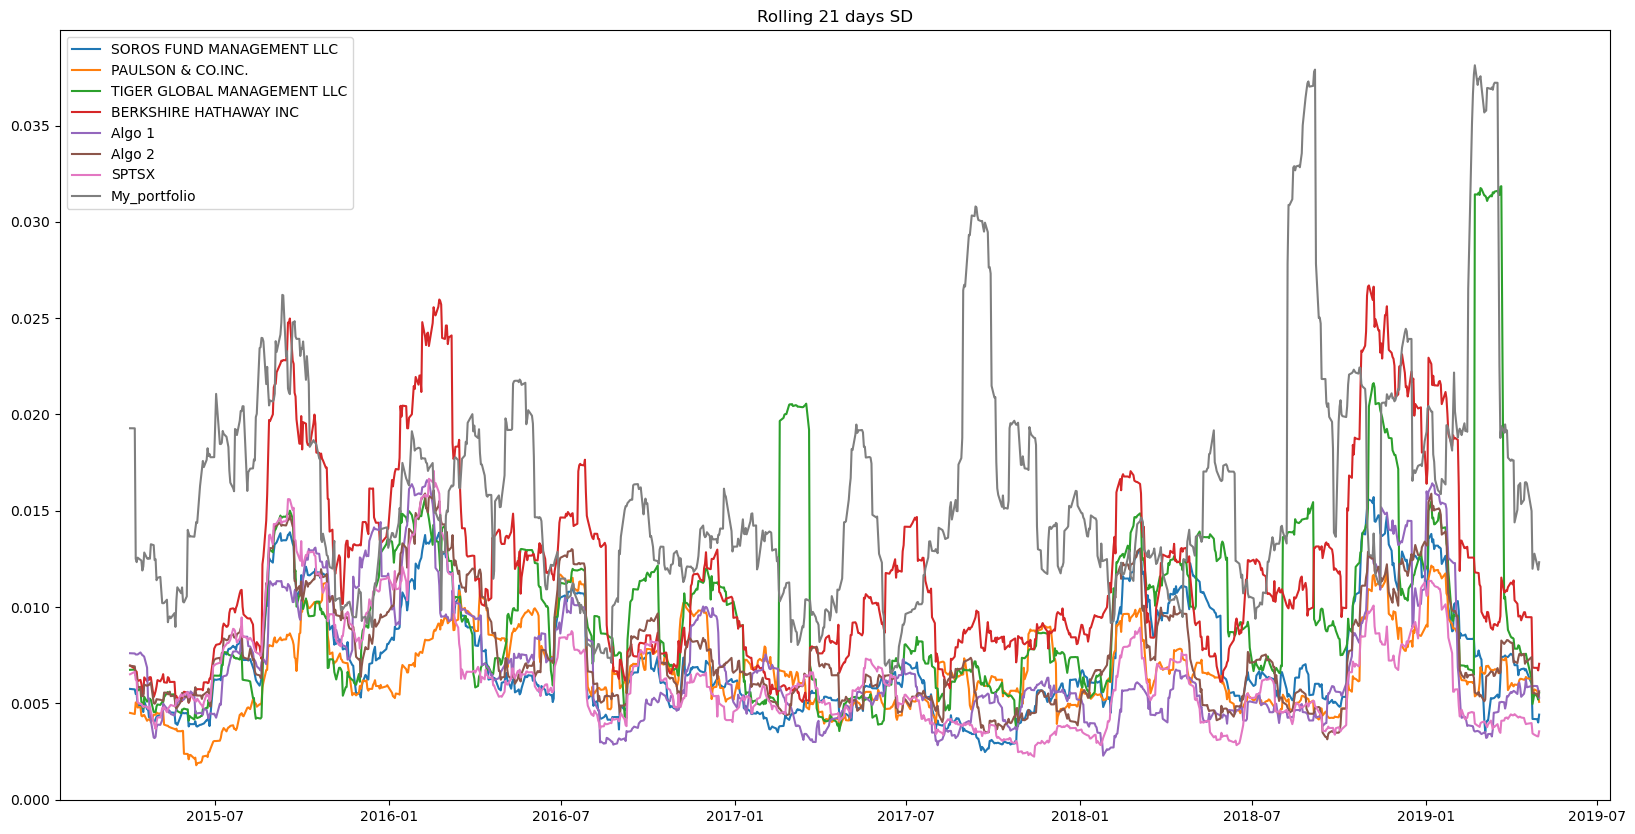

In [50]:
# Calculate rolling standard deviation
rolling_sd_my_v_other = combined_file_custom.rolling(window=21).std()

# Plot rolling standard deviation
rolling_sd_my_v_other.plot(figsize = (20,10), title= 'Rolling 21 days SD');

### Calculate and plot the correlation

<Axes: >

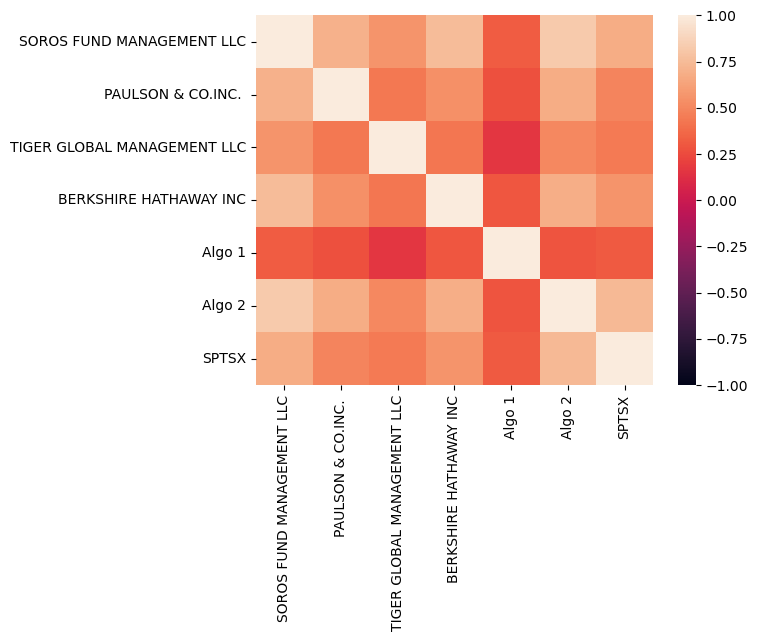

In [51]:
# Calculate and plot the correlation
correlation_new_custom = combined_file_custom.corr()
correlation_new_custom
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)


In [52]:
#sum of all corelation
correlation_new_custom.sum()

SOROS FUND MANAGEMENT LLC      4.898207
PAULSON & CO.INC.              4.168245
TIGER GLOBAL MANAGEMENT LLC    3.552355
BERKSHIRE HATHAWAY INC         4.302589
Algo 1                         2.656515
Algo 2                         4.779131
SPTSX                          4.237477
My_portfolio                   1.359963
dtype: float64

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

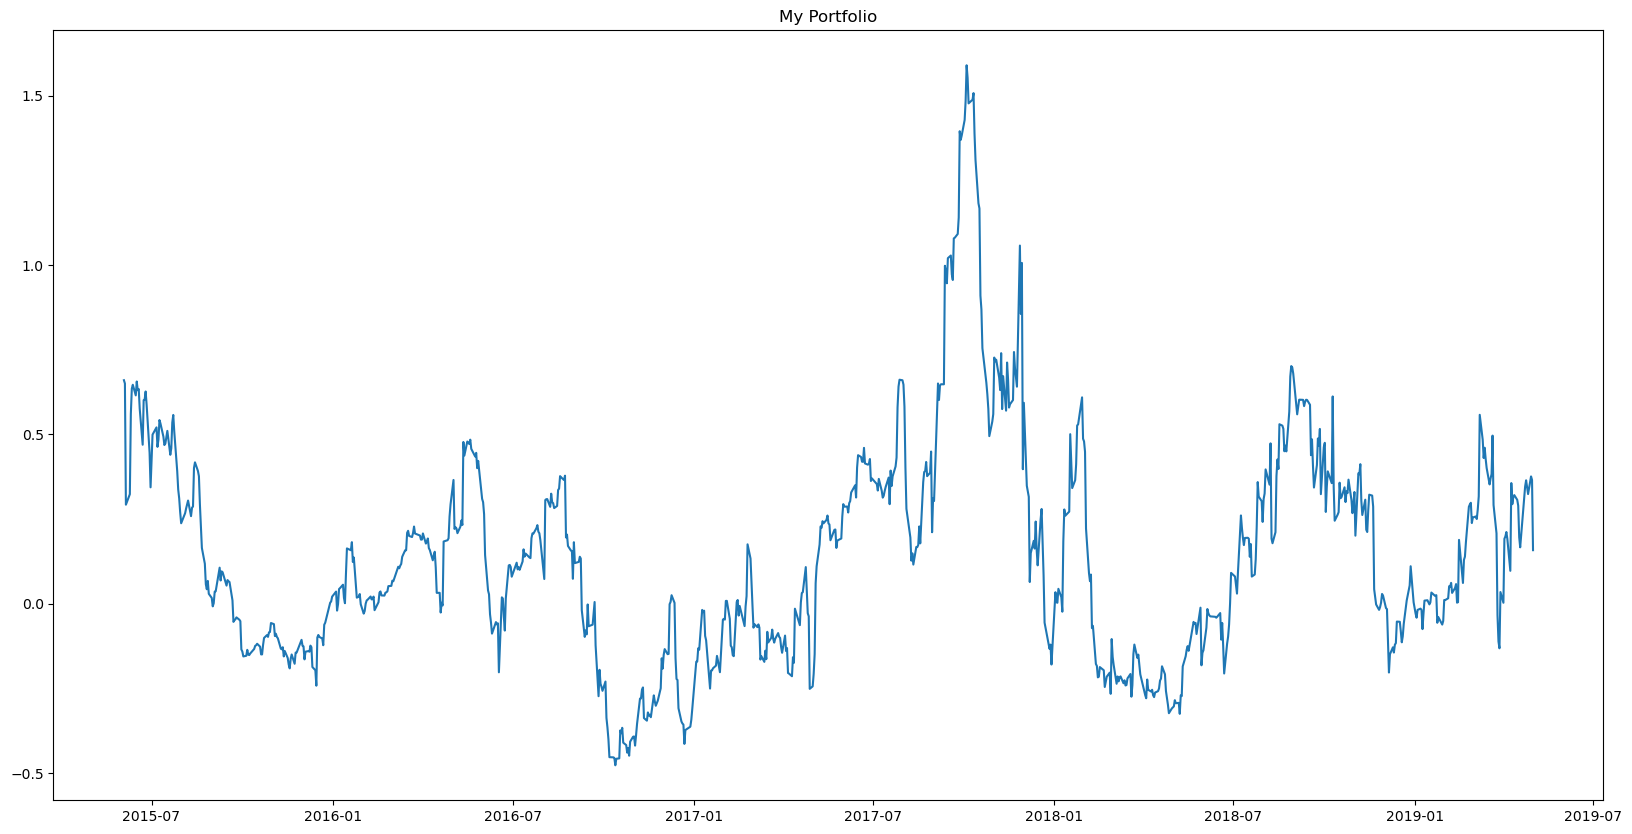

In [53]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
covariance = combined_file_custom['My_portfolio'].rolling(window=60).cov(combined_file_custom['SPTSX'])
                                                        
# Calculate variance of S&P TSX
var_sp = combined_file_custom['SPTSX'].rolling(window=60).var()
# Computing beta
berk_beta = covariance/var_sp
# Plot beta trend
berk_beta.plot(figsize = (20,10), title= "My Portfolio");

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Calculate Annualized Sharpe Ratios

sharp_ratio = (combined_file_custom.mean()*252)/(combined_file_custom.std()*np.sqrt(252))
sharp_ratio.sort_values(ascending=False,inplace=True)
sharp_ratio

Algo 1                         1.508227
My_portfolio                   0.784263
BERKSHIRE HATHAWAY INC         0.501865
Algo 2                         0.450156
SOROS FUND MANAGEMENT LLC      0.303357
SPTSX                          0.262692
TIGER GLOBAL MANAGEMENT LLC   -0.138310
PAULSON & CO.INC.             -0.435107
dtype: float64

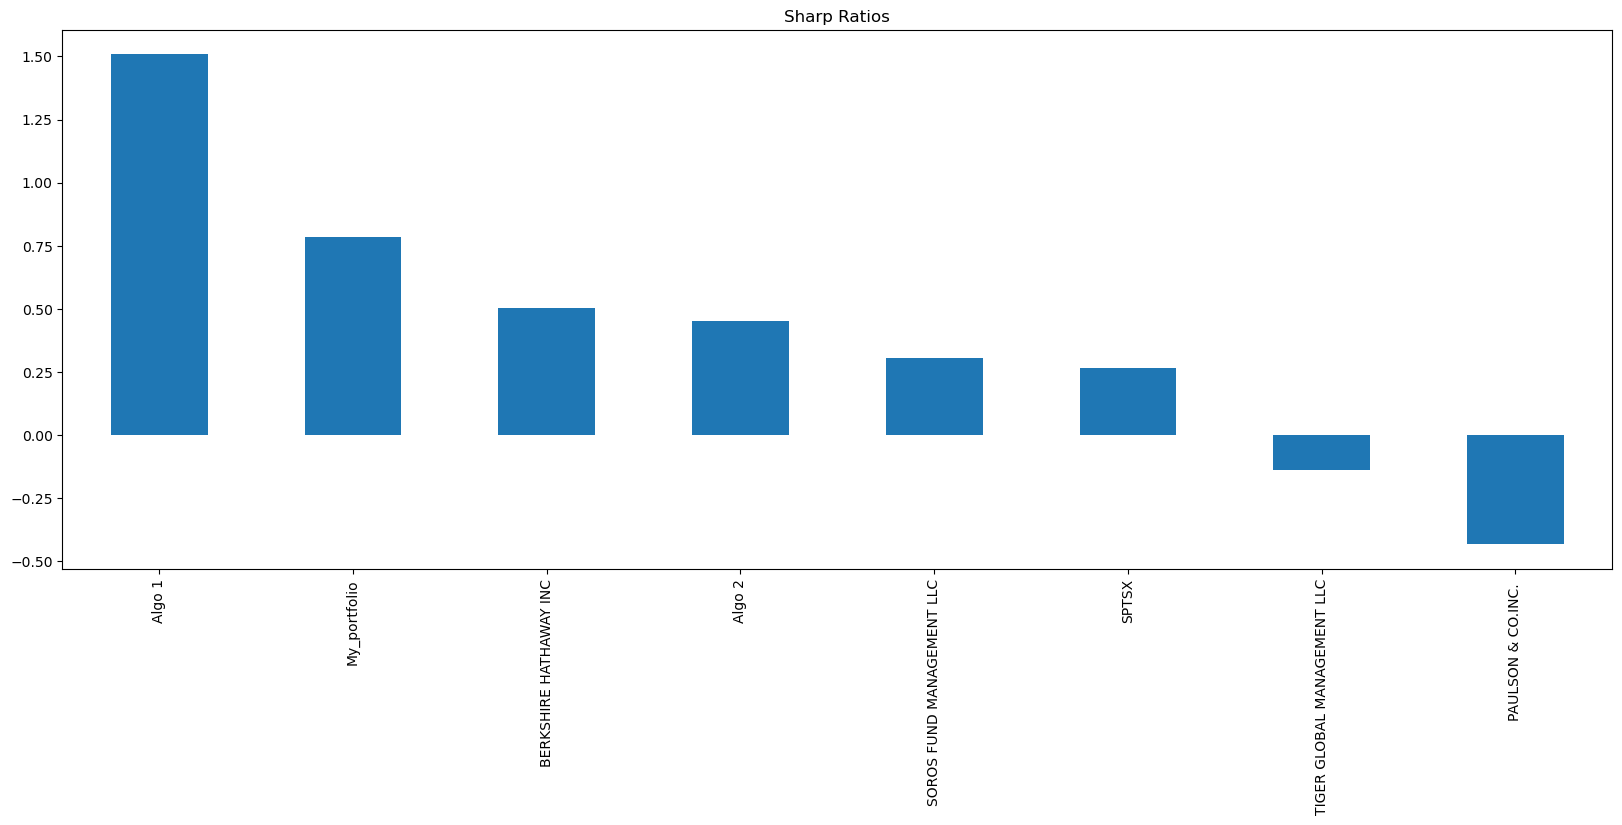

In [55]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot.bar(figsize = (20,7), title='Sharp Ratios');

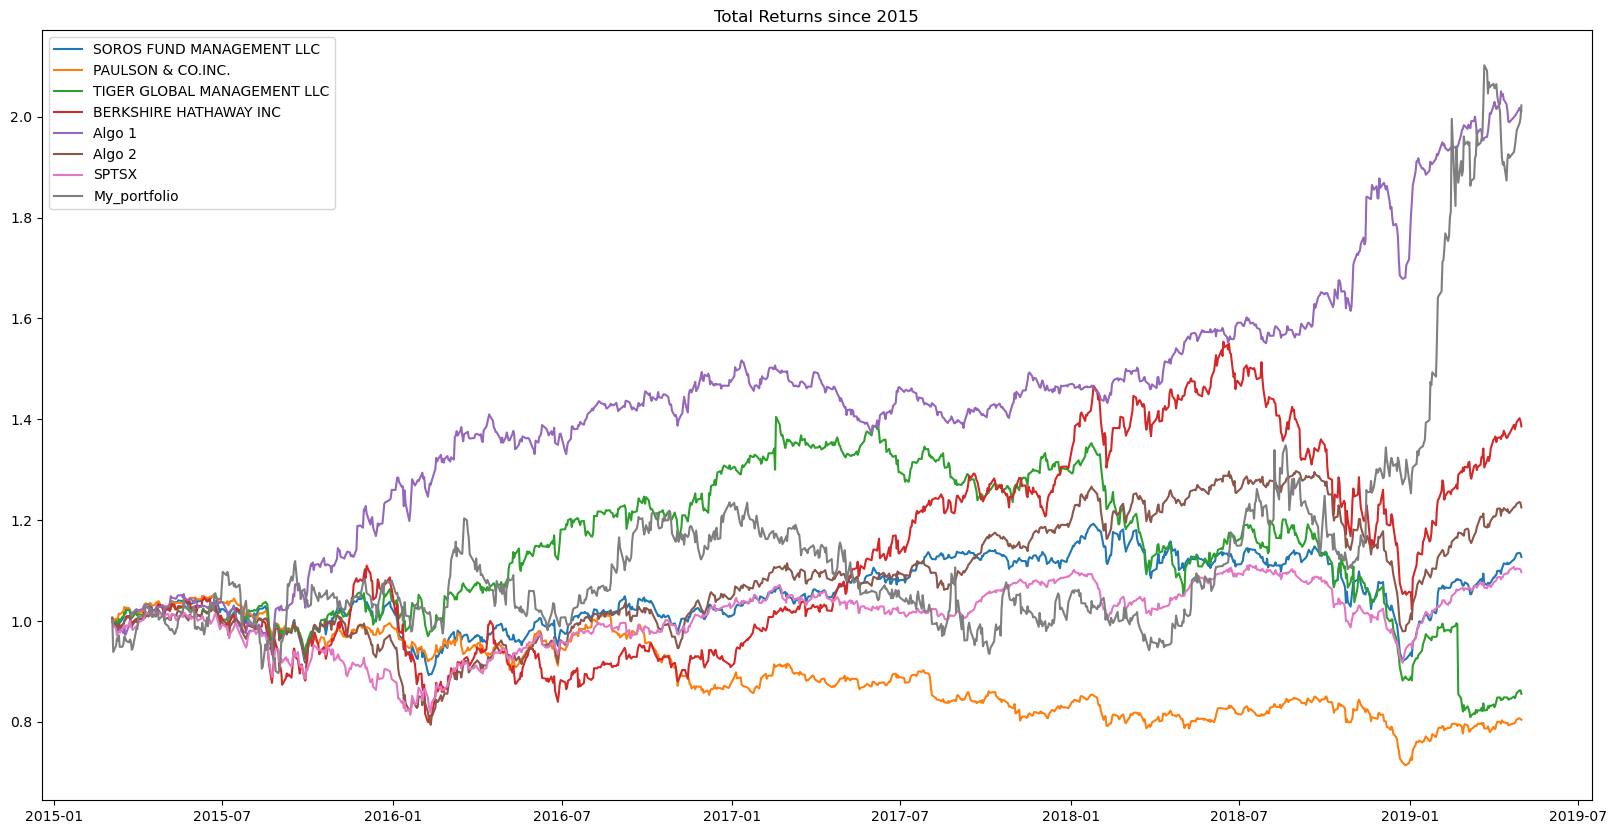

In [56]:
# to analyse how my customer portfolio did lets see the cumulative return
# Calculate cumulative returns of all portfolios
cumulative_return = (1+combined_file_custom).cumprod()
# Plot cumulative returns
cumulative_return.plot(figsize = (20,10), title= 'Total Returns since 2015');

### How does your portfolio do?

Answer:

Portfolio has 2nd best Sharp Ratio of 0.78 indicating it has better risk to reward ratio than S&PTSX (0.26). It is also lowest correlated to the market and therefore it has beaten the benchmark of S&PTSX. Although from above trending it is apparent that custom portfolio prior to 07-2018 was underperforming and since start of 2019 outperformed the market by big margin. 